In [1]:
# !python.exe -m pip install --upgrade pip

In [2]:
import glob
import pandas as pd
import numpy as np

In [3]:
filelists = glob.glob('./급성심장정지조사(08-20)xlsx/*.*')
filelists

['./급성심장정지조사(08-20)xlsx\\ohca_08xlsx.XLS',
 './급성심장정지조사(08-20)xlsx\\ohca_09xlsx.XLS',
 './급성심장정지조사(08-20)xlsx\\ohca_10xlsx.XLS',
 './급성심장정지조사(08-20)xlsx\\ohca_11xlsx.XLS',
 './급성심장정지조사(08-20)xlsx\\ohca_12xlsx.XLS',
 './급성심장정지조사(08-20)xlsx\\ohca_13xlsx.XLS',
 './급성심장정지조사(08-20)xlsx\\ohca_14xlsx.XLS',
 './급성심장정지조사(08-20)xlsx\\ohca_15xlsx.XLS',
 './급성심장정지조사(08-20)xlsx\\ohca_16xlsx.XLS',
 './급성심장정지조사(08-20)xlsx\\ohca_17xlsx.XLS',
 './급성심장정지조사(08-20)xlsx\\ohca_18xlsx.XLS',
 './급성심장정지조사(08-20)xlsx\\ohca_19.xlsx',
 './급성심장정지조사(08-20)xlsx\\ohca_20.xlsx']

In [4]:
# !pip install xlrd

In [5]:
dflists = [pd.read_excel(filename) for filename in filelists]
sum([len(i) for i in dflists])

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


355548

In [6]:
df = pd.concat(dflists)
len(df)

355548

In [7]:
a = np.unique(df.ER_RESULT)
b = np.zeros(8).astype('int8')
b[4] = 1
c = dict(zip(a,b))
c

{10: 0, 21: 0, 22: 0, 30: 0, 40: 1, 41: 0, 88: 0, 99: 0}

In [8]:
df['ER_RESULT'].replace(c,inplace = True)
np.unique(df['ER_RESULT'])

array([0, 1], dtype=int8)

In [9]:
df.describe(include = 'object').columns
df.drop(columns = df.describe(include = 'object').columns, inplace = True)

In [10]:
a = df.isnull().sum() > 0
print(a)
a[a].index   # True인 값만 뽑음

NUM                    False
YEAR                   False
H_ADMINCODE             True
P_ADMINCODE             True
H_SEX                  False
                       ...  
OP8_ROSC_DT             True
OP8_ROSC_TM             True
BYSTANDER_AED           True
OP2_PRE_VITAL_BT_DT     True
OP2_PRE_VITAL_BT_TM     True
Length: 222, dtype: bool


Index(['H_ADMINCODE', 'P_ADMINCODE', 'PRE_ER_ARREST_DT', 'PRE_ER_ARREST_TM',
       'LAST_NORM_TM', 'WITNESS_MAN1', 'WITNESS_MAN2', 'BYSTANDER_CPR_ELSE',
       'H_PLACE1', 'H_PLACE2',
       ...
       'OP8_PRE_VITAL_BT', 'OP8_PRE_VITAL_DT', 'OP8_PRE_VITAL_TM',
       'OP8_SUCCESS', 'OP8_ROSC', 'OP8_ROSC_DT', 'OP8_ROSC_TM',
       'BYSTANDER_AED', 'OP2_PRE_VITAL_BT_DT', 'OP2_PRE_VITAL_BT_TM'],
      dtype='object', length=202)

In [11]:
df.drop(columns=a[a].index, inplace = True)
df

NUM  YEAR  H_SEX  AGE  INS  WITNESS  WITNESS_MAN  BYSTANDER_CPR  \
0          1  2008      1   58    1        1            2              9   
1          2  2008      2   47    1        2            2              9   
2          3  2008      2   81    5        9            2              9   
3          4  2008      2   64    9        1            9              9   
4          5  2008      1   72    1        2            2              9   
...      ...   ...    ...  ...  ...      ...          ...            ...   
31412  31413  2020      1   96    5        9            9              9   
31413  31414  2020      2   42    1        1            2              9   
31414  31415  2020      1   61    1        2            1              8   
31415  31416  2020      1   87    1        2            2              1   
31416  31417  2020      1   91    5        2            1              8   

       H_PLACE_PUBLIC  H_PLACE  ACT  CAUSE  ER_ADM_DT  ER_ADM_TM  ER_EKG  \
0                   2        9    7      1   20080101        335       5   
1                   2        9    7      1   20080101       1013       5   
2                   2        9    7      1   20080101       1201       5   
3                   1        8   99      2   20080101       1208       9   
4                   2        9    7      1   20080101       1425       5   
...               ...      ...  ...    ...        ...        ...     ...   
31412               9        9   99      1   20200704       1923       5   
31413               2        1   88      2   20200717       2303       0   
31414               2        8    8      1   20200731       1848       5   
31415               1        8   88      1   20201112       1631       4   
31416               2        8    8      1   20200118       1532       5   

       ER_DEFIB  ER_RESULT  ER_DC_DT  ER_DC_TM  F_ADMINCODE  
0             1          1  20080101      9999        11440  
1             2          1  20080101      1210        11305  
2             1          1  20080101      9999        11440  
3             1          1  20080101      1300        11590  
4             1          1  20080101      1535        11560  
...         ...        ...       ...       ...          ...  
31412         2          1  20200704      2100        36110  
31413         1          0  20200718       135        36110  
31414         2          1  20200731      2010        36110  
31415         1          1  20201112      1755        36110  
31416         1          1  20200118      1750        36110  

[355548 rows x 20 columns]

In [12]:
df.drop(columns = ['NUM','INS','ER_ADM_DT','ER_ADM_TM','ER_DC_DT','ER_DC_TM','F_ADMINCODE'], inplace = True)

In [13]:
df = df[df.AGE != 999]   # 결측치 제거
df.head()

YEAR  H_SEX  AGE  WITNESS  WITNESS_MAN  BYSTANDER_CPR  H_PLACE_PUBLIC  \
0  2008      1   58        1            2              9               2   
1  2008      2   47        2            2              9               2   
2  2008      2   81        9            2              9               2   
3  2008      2   64        1            9              9               1   
4  2008      1   72        2            2              9               2   

   H_PLACE  ACT  CAUSE  ER_EKG  ER_DEFIB  ER_RESULT  
0        9    7      1       5         1          1  
1        9    7      1       5         2          1  
2        9    7      1       5         1          1  
3        8   99      2       9         1          1  
4        9    7      1       5         1          1

In [14]:
# 범주형 데이터 YEAR , H_SEX , AGE
# 년도 별 사망자 및 그 외
temp = df.groupby(['YEAR','ER_RESULT'])['H_SEX'].count()
temp = temp.reset_index()
temp.columns = ['YEAR','ER_RESULT','COUNT']
temp['total'] = temp.groupby(['YEAR']).transform('sum')['COUNT']
temp['rate'] = temp['COUNT']/temp['total']
temp.head(5)

YEAR  ER_RESULT  COUNT  total      rate
0  2008          0   2609  20091  0.129859
1  2008          1  17482  20091  0.870141
2  2009          0   3259  22667  0.143777
3  2009          1  19408  22667  0.856223
4  2010          0   3433  24479  0.140243

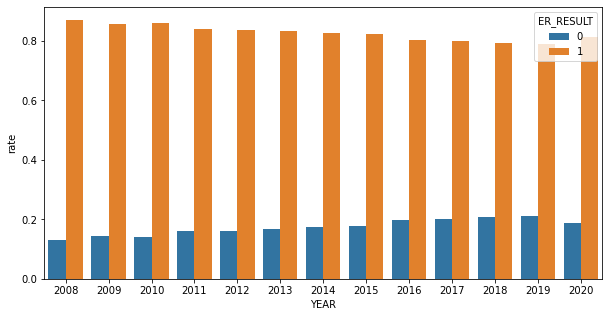

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
sns.barplot(data = temp, x = 'YEAR', y = 'rate', hue = 'ER_RESULT')
plt.show()

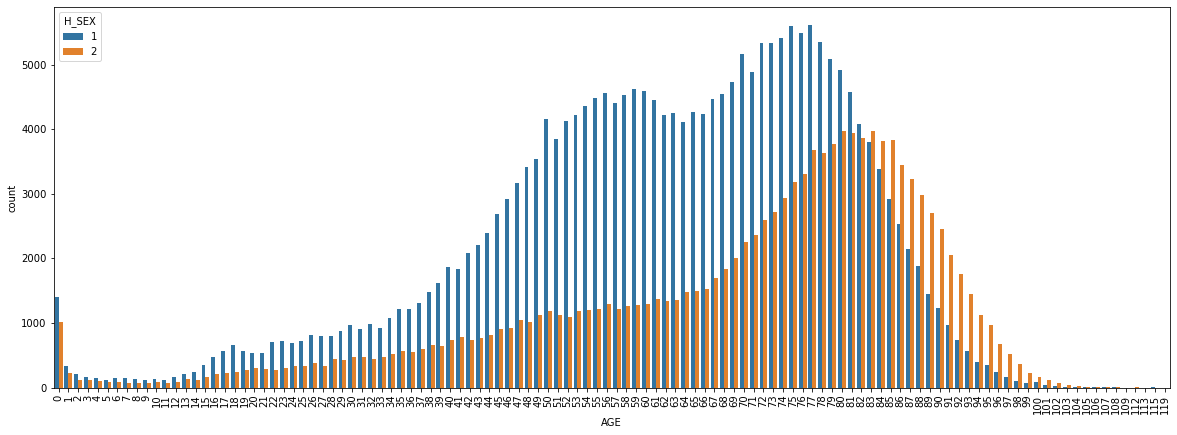

In [16]:
# 나이별로 응급환자
plt.figure(figsize = (20,7))
sns.countplot(data = df, x = 'AGE', hue = 'H_SEX')
plt.xticks(rotation = 90)
plt.show()

In [17]:
# sns.pairplot(data=df, hue='ER_RESULT')
# plt.show()

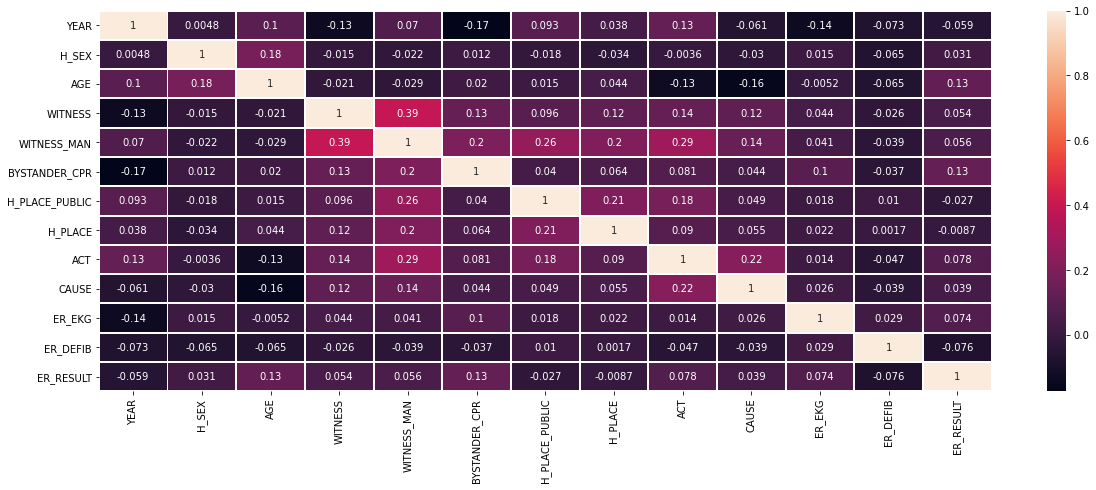

In [18]:
plt.figure(figsize = (20,7))
sns.heatmap(df.corr(),annot=True, linewidths=1)
plt.show()

In [19]:
# 분류모델을 만들기 위해 연도를 빼줌
df = df.iloc[:,1:]
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [20]:
# 스케일링
from sklearn.preprocessing import RobustScaler
x = RobustScaler().fit_transform(x)
x

array([[ 0.        , -0.38461538, -1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -0.80769231,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.        ,  0.5       ,  7.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        , -0.26923077,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        ,  0.73076923,  0.        , ...,  0.        ,
        -1.        ,  0.        ],
       [ 0.        ,  0.88461538,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=32)

In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=3)
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train), rfc.score(x_test,y_test)

(0.8507689942133232, 0.8509501254458108)

In [23]:
from sklearn.model_selection import cross_val_score
cvc = cross_val_score(rfc,x,y,cv=5)
print(cvc)
cvc.mean()

[0.82364357 0.82364357 0.84493573 0.87993981 0.88166962]


0.8507664613394088

In [24]:
# 오래걸림
# from sklearn.svm import SVC
# svc = SVC()
# cvc = cross_val_score(svc,x,y,cv=5)
# print(cvc)
# cvc.mean

In [25]:
# 신경망
# 하이퍼 파라미터
# L = 5 신경망
n_input = 11
n_hidden1 = 1024
n_hidden2 = 512
n_hidden3 = 512
n_hidden4 = 512
n_output = 1

In [32]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
model = tf.keras.Sequential
model.add(Dense(n_hidden1, activation='relu', input_shape = (n_input,)))
model.add(Dense(n_hidden2, activation='relu'))
model.add(Dense(n_hidden3, activation='relu'))
model.add(Dense(n_hidden4, activation='relu'))
model.add(Dense(n_output, activation='sigmoid'))  # output = 1이기 때문에 sigmoid
model.compile(loss = tf.keras.losses.binary_crossentropy, optimizer = 'adam', metrics = ['accuracy'])
model.fit(x_train,y_train, validation_data = (x_test,y_test), batch_size = 36, epochs = 10)

TypeError: add() missing 1 required positional argument: 'layer'